<a href="https://colab.research.google.com/github/NupurFunkwal/Artificial_Intelligence/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Travelling Salesman Problem
TSP was solved for 14 cities using Genetic algorithm using 2 versions:
the basic genetic algorithm and the improved version to perform better in terms of time

In [1]:
import pandas as pd
import numpy as np
import math
import random
from random import randint

infi= math.inf  #infinity
dict=({"A":[0, infi, infi, infi, infi, infi, 0.15, infi, infi,0.2, infi, 0.12, infi, infi],
                  "B":[ infi, 0, infi, infi, infi, infi, infi, 0.19, 0.4,  infi, infi, infi, infi, 0.13],
                  "C":[ infi, infi, 0, 0.6, 0.22, 0.4,  infi, infi, 0.2,  infi, infi, infi, infi, infi],
                  "D":[ infi, infi, 0.6, 0, infi, 0.21, infi, infi, infi, infi, 0.3, infi, infi, infi],
                  "E":[ infi, infi, 0.22, infi, 0, infi, infi, infi, 0.18, infi, infi, infi, infi, infi],
                  "F":[ infi, infi, 0.4, 0.21, infi, 0, infi, infi, infi, infi, 0.37, 0.6, 0.26, 0.9],
                  "G":[ 0.15, infi, infi, infi, infi, infi, 0, infi, infi, infi, 0.55, 0.18, infi, infi],
                  "H":[ infi, 0.19, infi, infi, infi, infi, infi, 0, infi, 0.56, infi, infi, infi, 0.17],
                  "I":[ infi,0.4, 0.2, infi, 0.18, infi, infi, infi, 0, infi, infi, infi, infi, 0.6],
                  "J":[ 0.2, infi, infi, infi, infi, infi, infi, 0.56, infi, 0, infi, 0.16, infi, 0.5],
                  "K":[ infi, infi, infi, 0.3, infi, 0.37, 0.55, infi, infi, infi, 0, infi, 0.24, infi],
                  "L":[ 0.12, infi, infi, infi, infi, 0.6, 0.18, infi, infi, 0.16, infi, 0, 0.4, infi],
                  "M":[  infi, infi, infi, infi, infi, 0.26, infi, infi, infi, infi, 0.24, 0.4, 0, infi],
                  "N":[ infi, 0.13, infi, infi, infi, 0.9, infi, 0.17, 0.6, 0.5, infi, infi, infi, 0],
                  "cities": ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']})

dict2=({"A":[0, 1000, 1000, 1000, 1000, 1000, 0.15, 1000, 1000, 0.2, 1000, 0.12, 1000, 1000],
                  "B":[ 1000, 0, 1000, 1000, 1000, 1000, 1000, 0.19, 0.4,  1000, 1000, 1000, 1000, 0.13],
                  "C":[ 1000, 1000, 0, 0.6, 0.22, 0.4,  1000, 1000, 0.2,  1000, 1000, 1000, 1000, 1000],
                  "D":[ 1000, 1000, 0.6, 0, 1000, 0.21, 1000, 1000, 1000, 1000, 0.3, 1000, 1000, 1000],
                  "E":[ 1000, 1000, 0.22, 1000, 0, 1000, 1000, 1000, 0.18, 1000, 1000, 1000, 1000, 1000],
                  "F":[ 1000, 1000, 0.4, 0.21, 1000, 0, 1000, 1000, 1000, 1000, 0.37, 0.6, 0.26, 0.9],
                  "G":[ 0.15, 1000, 1000, 1000, 1000, 1000, 0, 1000, 1000, 1000, 0.55, 0.18, 1000, 1000],
                  "H":[ 1000, 0.19, 1000, 1000, 1000, 1000, 1000, 0, 1000, 0.56, 1000, 1000, 1000, 0.17],
                  "I":[ 1000,0.4, 0.2, 1000, 0.18, 1000, 1000, 1000, 0, 1000, 1000, 1000, 1000, 0.6],
                  "J":[ 0.2, 1000, 1000, 1000, 1000, 1000, 1000, 0.56, 1000, 0, 1000, 0.16, 1000, 0.5],
                  "K":[ 1000, 1000, 1000, 0.3, 1000, 0.37, 0.55, 1000, 1000, 1000, 0, 1000, 0.24, 1000],
                  "L":[ 0.12, 1000, 1000, 1000, 1000, 0.6, 0.18, 1000, 1000, 0.16, 1000, 0, 0.4, 1000],
                  "M":[  1000, 1000, 1000, 1000, 1000, 0.26, 1000, 1000, 1000, 1000, 0.24, 0.4, 0, 1000],
                  "N":[ 1000, 0.13, 1000, 1000, 1000, 0.9, 1000, 0.17, 0.6, 0.5, 1000, 1000, 1000, 0],
                  "cities": ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']})


df = pd.DataFrame(dict2)
df = df.set_index('cities')
df




,A,B,C,D,E,F,G,H,I,J,K,L,M,N
cities,,,,,,,,,,,,,,
A,0.00,1000.00,1000.00,1000.00,1000.00,1000.00,0.15,1000.00,1000.00,0.20,1000.00,0.12,1000.00,1000.00
B,1000.00,0.00,1000.00,1000.00,1000.00,1000.00,1000.00,0.19,0.40,1000.00,1000.00,1000.00,1000.00,0.13
C,1000.00,1000.00,0.00,0.60,0.22,0.40,1000.00,1000.00,0.20,1000.00,1000.00,1000.00,1000.00,1000.00
D,1000.00,1000.00,0.60,0.00,1000.00,0.21,1000.00,1000.00,1000.00,1000.00,0.30,1000.00,1000.00,1000.00
E,1000.00,1000.00,0.22,1000.00,0.00,1000.00,1000.00,1000.00,0.18,1000.00,1000.00,1000.00,1000.00,1000.00
F,1000.00,1000.00,0.40,0.21,1000.00,0.00,1000.00,1000.00,1000.00,1000.00,0.37,0.60,0.26,0.90
G,0.15,1000.00,1000.00,1000.00,1000.00,1000.00,0.00,1000.00,1000.00,1000.00,0.55,0.18,1000.00,1000.00
H,1000.00,0.19,1000.00,1000.00,1000.00,1000.00,1000.00,0.00,1000.00,0.56,1000.00,1000.00,1000.00,0.17
I,1000.00,0.40,0.20,1000.00,0.18,1000.00,1000.00,1000.00,0.00,1000.00,1000.00,1000.00,1000.00,0.60


In [2]:
#initial population

def Initial_pop(size):
  state = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
  population = []
  for i in range(size):
    population.append(state)
  
  return population


In [3]:
#calculating total distance for a state

def Distance(state):
  total_dist = 0
  for i in range(13):
    start = state[i]
    end = state[i+1]
    total_dist += df.loc[start][end]
    
  total_dist += df.loc[state[13]][state[0]]
  return total_dist

  

In [4]:
#fitness value of a state

def Fitness(state):
  fitness = (1/Distance(state)) + 1
  return fitness


In [5]:
#fitness of entire population

def Pop_Fitness(population):
  fitness = [ ((1/Distance(i))+1) for i in population]
  return fitness
  

In [6]:
#Best fitness from the popluation

def Best_Fitness(pop_fitness):
  best_val = np.max(pop_fitness)
  best_state_index = pop_fitness.index(best_val)

  return (best_val,best_state_index)


In [7]:

#reproduce from two parents

def Reproduce(x, y):
  child = [None]* len(x)
  left = randint(0, len(x)-1)
  right = randint(left+1, len(x))
  child[left:right] = x[left:right]     #taking the sublist from parent x

  for i in range(len(y)):
    if (y[i] in child) :
      continue
    else :
      pos = child.index(None)
      child[pos] = y[i]
  
  return child


In [8]:
#selecting 2 parents randomly with probability based on fitness

def Random_sel(pop_fitness):

  small = np.min(pop_fitness)
  big = np.max(pop_fitness)

  prob = None

  if (small!=big):
    prob = [(i-small)/(big-small) for i in pop_fitness]
    prob = [ (i/(np.sum(prob))) for i in prob]
  else :
    prob = [i/np.sum(pop_fitness) for i in pop_fitness]

  sample_size = 2
  choice_indices = np.random.choice(len(prob), size=sample_size, replace=True, p=prob)
  return choice_indices


In [9]:
#mutation

def Mutate(state):
  while (1):
    c1 = randint(0,len(state)-1)
    c2 = randint(0, len(state)-1)
    if (c1!=c2):
      #swap
      temp = state[c1]
      state[c1] = state[c2]
      state[c2] = temp
      break

  return state


In [10]:
#finding nearest neighbour
def Nearest(city):
  min_dist = 1000
  cities = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
  ans = None    #the nearest neighbour
  for i in range(len(cities)):
    if (city != cities[i]):
      if (df.loc[city][cities[i]] < min_dist):
        min_dist = df.loc[city][cities[i]]
        ans = cities[i]
  
  return ans


In [11]:
#randomly finding neighbour of a city who is not at infinity

def Neighbour(city):
  cities = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
  neighbours = []
  for i in range(len(cities)):
    if (city!=cities[i] and df.loc[city][cities[i]]!=1000):
      neighbours.append(cities[i])
  
  pick = randint(0,len(neighbours)-1)
  return neighbours[pick]
  

In [12]:
#improved version of mutate version

def Mutate_imp(state):
  left = randint(0, len(state)-1)
  right = randint(left+1, len(state))

  #inversion
  temp = state[left:right]
  temp.reverse()
  state[left:right]=temp

  #pick a random city and find its nearest neighbour, then pick the neighbours' neighbour and swap them
  index = randint(0, len(state)-1)
  city = state[index]     #random city name
  nearest = Nearest(city)     #nearest city name to city
  neighbour = Neighbour(nearest)
  neighbour_index = state.index(neighbour)
  #swap
  swap_val = state[index]
  state[index] = state[neighbour_index]
  state[neighbour_index] = swap_val

  return state
  

In [13]:
import numpy as np

#genetic algorithm

def Genetic_Algo(population):
  overall_gen = -1
  overall_best_fitness = -1
  overall_best_state = []
  generation = []
  y_values = []

  pop_fitness = Pop_Fitness(population)         #population fitness
  best_fitness_val, best_state_index = Best_Fitness(pop_fitness)
  best_state = population[best_state_index]

  time=0        #generation
  generation.append(time)
  y_values.append(best_fitness_val)

  while (time<750):
    time += 1
    new_population=[]
    for i in range(20):
      choice_indices = Random_sel(pop_fitness)
      x = population[choice_indices[0]]
      y = population[ choice_indices[1]]
      child = Reproduce(x,y)
      #mutation
      mutate_num = random.uniform(0, 1)
      if(mutate_num<0.15):
        child = Mutate(child)
      new_population.append(child)
           
    population = new_population
    pop_fitness = Pop_Fitness(population)
    best_fitness_val, best_state_index = Best_Fitness(pop_fitness)
    generation.append(time)
    y_values.append(best_fitness_val)
    if (best_fitness_val>overall_best_fitness):
      overall_best_fitness = best_fitness_val
      overall_best_state = population[best_state_index]
      overall_gen = time
    

  print("Old Version")
  print()
  print('best fitness value=', overall_best_fitness)
  print("Optimal distance found=", 1/(overall_best_fitness-1))
  print('Final best state=', overall_best_state)
  print('generation found=', overall_gen)
  print()
  return (generation,y_values)
  


In [14]:

import numpy as np

#genetic algorithm

def Genetic_Algo_imp(population):
  overall_gen = -1
  overall_best_fitness = -1
  overall_best_state = []
  generation = []
  y_values = []

  pop_fitness = Pop_Fitness(population)         #population fitness
  best_fitness_val, best_state_index = Best_Fitness(pop_fitness)
  best_state = population[best_state_index]

  time=0
  generation.append(time)
  y_values.append(best_fitness_val)

  while (time<750):
    time += 1
    new_population=[]
    for i in range(30):
      choice_indices = Random_sel(pop_fitness)
      x = population[choice_indices[0]]
      y = population[ choice_indices[1]]
      child = Reproduce(x,y)
      #mutation
      mutate_num = random.uniform(0, 1)
      if(mutate_num<0.2):
        child = Mutate_imp(child)
      new_population.append(child)
           
    population = new_population
    pop_fitness = Pop_Fitness(population)
    best_fitness_val, best_state_index = Best_Fitness(pop_fitness)
    generation.append(time)
    y_values.append(best_fitness_val)

    if (best_fitness_val>overall_best_fitness):
      overall_best_fitness = best_fitness_val
      overall_best_state = population[best_state_index]
      overall_gen = time
    

  print("New Version")
  print()
  print('best fitness value=', overall_best_fitness)
  print("Optimal distance found=", 1/(overall_best_fitness-1))
  print('Final best state=', overall_best_state)
  print('generation found=', overall_gen)
  print()
  return (generation,y_values)
  


Old Version

best fitness value= 1.000995549891983
Optimal distance found= 1004.4699999999195
Final best state= ['B', 'N', 'F', 'D', 'C', 'I', 'E', 'A', 'G', 'K', 'M', 'L', 'J', 'H']
generation found= 78

New Version

best fitness value= 1.267379679144385
Optimal distance found= 3.7400000000000007
Final best state= ['A', 'J', 'N', 'H', 'B', 'I', 'E', 'C', 'F', 'D', 'K', 'M', 'L', 'G']
generation found= 27



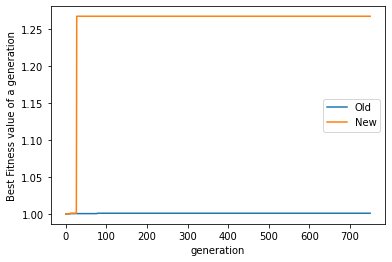

In [16]:
import matplotlib
import matplotlib.pyplot as plt

for i in range(1):
  pop1 = Initial_pop(20)
  gen1, y1 = Genetic_Algo(pop1)
  plt.plot(gen1,y1, label='Old')
  plt.xlabel('generation')
  plt.ylabel('Best Fitness value of a generation')

  pop2 = Initial_pop(30)
  gen2, y2 = Genetic_Algo_imp(pop2)
  plt.plot(gen2,y2, label='New')
  plt.xlabel('generation')
  plt.ylabel('Best Fitness value of a generation')
  plt.legend()
  plt.show()